In [1]:
import numpy as nmp
import os
import matplotlib.pyplot as pylt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [2]:
vgm = VGG16(weights='imagenet', include_top=False)
bmod = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [3]:
for layer in bmod.layers:
    layer.trainable = False
model = Sequential([
    bmod,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

In [4]:
def extract_features_from_directory(directory, vgm):
    features = []
    paths = []
    
    for image in os.listdir(directory):
        images_path = os.path.join(directory, image)
        im = load_img(images_path, target_size=(224, 224))
        im = img_to_array(im)
        im = nmp.expand_dims(im, axis=0)  
        im = preprocess_input(im)
        
        feature_maps = vgm.predict(im)
        feature_flatten = feature_maps.reshape((feature_maps.shape[0], -1))
        
        features.append(feature_flatten.flatten())
        paths.append(images_path)
        
    return nmp.array(features), paths


feat_class_0, _ = extract_features_from_directory('GardensPointWalking/day_left/', vgm)
feat_class_1, _ = extract_features_from_directory('GardensPointWalking/day_right/', vgm)

1/1 [==============================] - 0s 353ms/step


In [5]:
f_class = nmp.vstack([feat_class_0, feat_class_1])
labels = [0] * len(os.listdir('GardensPointWalking/day_left/')) + [1] * len(os.listdir('GardensPointWalking/day_right/'))

In [6]:
feat_class_0 = nmp.array(feat_class_0)
feat_class_1 = nmp.array(feat_class_1)

f_class = nmp.vstack([feat_class_0, feat_class_1])


labels = nmp.concatenate([nmp.zeros(feat_class_0.shape[0]), nmp.ones(feat_class_1.shape[0])])


indices = nmp.arange(f_class.shape[0])
nmp.random.shuffle(indices)

f_class = f_class[indices]
labels = labels[indices]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


custom_model = Sequential()


custom_model.add(Dense(512, activation='relu', input_shape=(25088,)))
custom_model.add(Dense(256, activation='relu'))
custom_model.add(Dense(1, activation='sigmoid'))  

custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = custom_model.fit(f_class, labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


10/10 [==============================] - 3s 147ms/step - loss: 6.7195 - accuracy: 0.7406 - val_loss: 1.5075 - val_accuracy: 0.9125
Epoch 2/10
10/10 [==============================] - 1s 129ms/step - loss: 0.7768 - accuracy: 0.9625 - val_loss: 3.8742 - val_accuracy: 0.8875
Epoch 3/10
10/10 [==============================] - 1s 125ms/step - loss: 0.3255 - accuracy: 0.9750 - val_loss: 3.6045 - val_accuracy: 0.8750
Epoch 4/10
10/10 [==============================] - 1s 116ms/step - loss: 0.1423 - accuracy: 0.9906 - val_loss: 3.6449 - val_accuracy: 0.9000
Epoch 5/10
10/10 [==============================] - 1s 111ms/step - loss: 0.0218 - accuracy: 0.9937 - val_loss: 2.9275 - val_accuracy: 0.8750
Epoch 6/10
10/10 [==============================] - 1s 127ms/step - loss: 5.1229e-04 - accuracy: 1.0000 - val_loss: 3.1429 - val_accuracy: 0.8875
Epoch 7/10
10/10 [==============================] - 1s 112ms/step - loss: 2.0326e-04 - accuracy: 1.0000 - val_loss: 3.2990 - val_accuracy: 0.

In [7]:
comparison_directory = 'GardensPointWalking/night_right/'
input_images_path = os.path.join(comparison_directory, 'Image001.jpg')  
im = load_img(input_images_path, target_size=(224, 224))
im = img_to_array(im)
im = nmp.expand_dims(im, axis=0)  
im = preprocess_input(im)
in_feat = vgm.predict(im)
comparison_features, comparison_paths = extract_features_from_directory(comparison_directory, vgm)

1/1 [==============================] - 0s 349ms/step


In [8]:
in_feat = in_feat.reshape(1, 25088)
similarities = []
for path, feature in zip(comparison_paths, comparison_features):
    feature = feature.reshape(1, 25088) 
    similarity = cosine_similarity(feature, in_feat)[0][0]
    similarities.append((path, similarity))
for path, similarity in similarities:
    print(f"Path: {path}, Similarity: {similarity}")

Path: GardensPointWalking/night_right/Image000.jpg, Similarity: 0.6492950320243835
Path: GardensPointWalking/night_right/Image001.jpg, Similarity: 1.0
Path: GardensPointWalking/night_right/Image002.jpg, Similarity: 0.7333081960678101
Path: GardensPointWalking/night_right/Image003.jpg, Similarity: 0.6383323073387146
Path: GardensPointWalking/night_right/Image004.jpg, Similarity: 0.45525050163269043
Path: GardensPointWalking/night_right/Image005.jpg, Similarity: 0.4528331160545349
Path: GardensPointWalking/night_right/Image006.jpg, Similarity: 0.3789432644844055
Path: GardensPointWalking/night_right/Image007.jpg, Similarity: 0.3595495820045471
Path: GardensPointWalking/night_right/Image008.jpg, Similarity: 0.31197449564933777
Path: GardensPointWalking/night_right/Image009.jpg, Similarity: 0.28684380650520325
Path: GardensPointWalking/night_right/Image010.jpg, Similarity: 0.2630753815174103
Path: GardensPointWalking/night_right/Image011.jpg, Similarity: 0.26386865973472595
Path: GardensPo

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


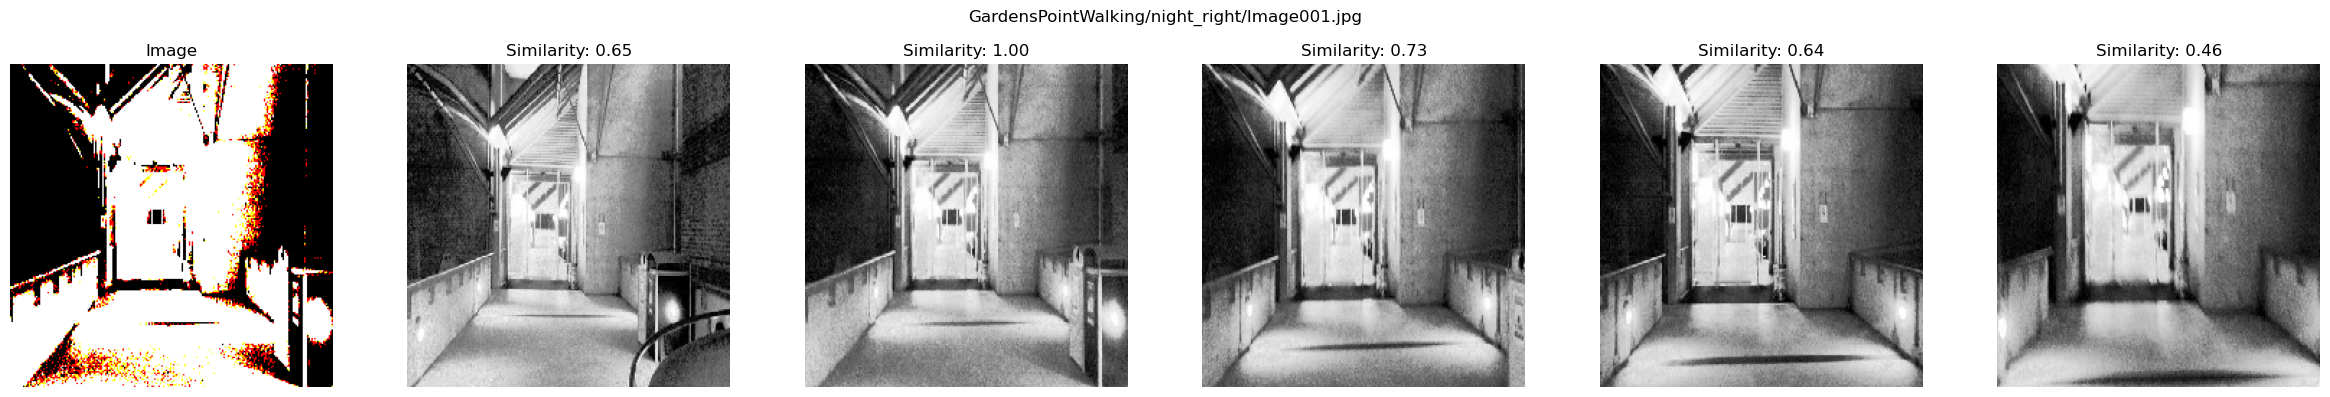

In [9]:
fig, axes = pylt.subplots(1, 6, figsize=(24, 4))
fig.suptitle(f"{input_images_path}")

axes[0].imshow(im.reshape(224, 224, 3))  
axes[0].set_title("Image")
axes[0].axis('off')

for i, (path, similarity) in enumerate(similarities[:5]):
    im = load_img(path, target_size=(224, 224))
    im = img_to_array(im)
    im = im.astype(nmp.uint8)
    
    axes[i + 1].imshow(im)
    axes[i + 1].set_title(f"Similarity: {similarity:.2f}")
    axes[i + 1].axis('off')

pylt.tight_layout(rect=[0, 0, 1, 0.96]) 
pylt.show()

13/13 [==============================] - 0s 14ms/step


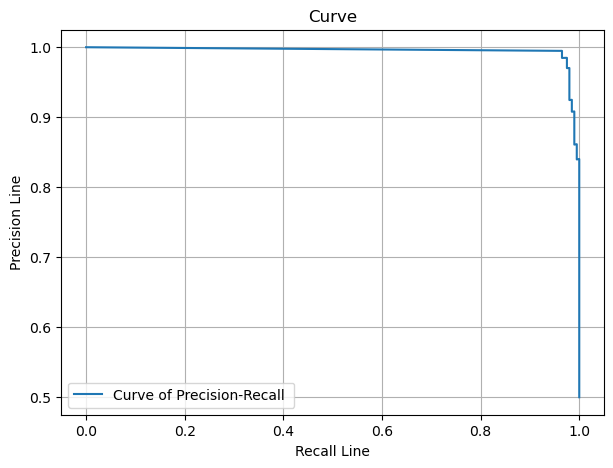

In [10]:
y_pr_problem = custom_model.predict(f_class)

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(labels, y_pr_problem)
pylt.figure(figsize=(7, 5))
pylt.plot(recall, precision, label='Curve of Precision-Recall ')
pylt.xlabel('Recall Line')
pylt.ylabel('Precision Line')
pylt.title('Curve')
pylt.legend()
pylt.grid(True)
pylt.show()